# Projet Portfolio : Fusion de Données Basket (LNB + EuroLeague)
**Objectif :** Charger, nettoyer et fusionner les statistiques des joueurs de la LNB Pro A et de l'EuroLeague pour créer un dataset unifié.

In [ ]:
import pandas as pd

df_lnb = pd.read_csv('../data/stats_joueurs_proa_2024.csv')
df_euroleague = pd.read_csv('../data/stats_joueurs_euroleague_2024.csv')



In [3]:
print("inspection LNB")
print(df_lnb.head())
print(df_lnb.info())

inspection LNB
   s_games  s_games_started  s_minutes_average minutes_display  \
0       29                0              22.92        22' 55''   
1       19               19              26.00        26' 00''   
2       25               25              23.67        23' 40''   
3       30               30              31.34        31' 20''   
4       29               26              25.25        25' 15''   

   s_points_average  s_two_pointers_made_average  \
0             18.17                         2.62   
1             17.11                         2.26   
2             16.88                         4.92   
3             16.27                         3.90   
4             16.24                         2.62   

   s_two_pointers_attempted_average  s_two_pointers_percentage  \
0                              5.28                      49.67   
1                              5.26                      43.00   
2                              8.32                      59.13   
3          

In [4]:
print("inspection Euroleague")
print(df_euroleague.head())
print(df_euroleague.info())

inspection Euroleague
   playerRanking  gamesPlayed  gamesStarted  minutesPlayed  pointsScored  \
0              1         35.0          31.0      28.825238          20.4   
1              2         40.0          39.0      30.827083          20.0   
2              3         38.0          38.0      30.393421          19.8   
3              4         37.0          37.0      27.329279          19.0   
4              5         30.0          30.0      27.487222          17.7   

   twoPointersMade  twoPointersAttempted twoPointersPercentage  \
0              4.3                   8.0                 53.9%   
1              4.4                   7.9                 56.3%   
2              4.9                   7.6                 64.5%   
3              6.2                  12.0                   52%   
4              3.3                   6.0                   55%   

   threePointersMade  threePointersAttempted  ... foulsDrawn   pir  \
0                2.9                     8.0  ...     

In [5]:
df_euroleague[['lastName_temp', 'firstName_temp']] = df_euroleague['player.name'].str.split(',', expand=True,n=1)
if df_euroleague['firstName_temp'].isnull().sum() < len(df_euroleague) * 0.5: # Vérifie si la séparation a marché pour au moins 50%
    df_euroleague['firstName'] = df_euroleague['firstName_temp'].str.strip()
    df_euroleague['lastName'] = df_euroleague['lastName_temp'].str.strip()
    print("Séparation Nom/Prénom EuroLeague (format ', ') réussie.")
else:
    # Essayer de séparer par le dernier espace (Prénom NOM)
    df_euroleague[['firstName_temp', 'lastName_temp']] = df_euroleague['player.name'].str.rsplit(' ', expand=True, n=1)
    df_euroleague['firstName'] = df_euroleague['firstName_temp'].str.strip()
    df_euroleague['lastName'] = df_euroleague['lastName_temp'].str.strip()
    print("Séparation Nom/Prénom EuroLeague (format ' ') réussie.")

Séparation Nom/Prénom EuroLeague (format ', ') réussie.


In [6]:
df_euroleague.rename(columns={'player.team.name': 'teamName'}, inplace=True)

    # Ajouter la source
df_euroleague['source'] = 'EuroLeague'

    # Sélectionner et réorganiser les colonnes identifiantes
cols_euro_id = ['firstName', 'lastName', 'teamName', 'source']
df_euro_id = df_euroleague[cols_euro_id] # Temporaire pour vérifier



# 1.2 Nettoyer df_lnb (LNB)
try:
    # Renommer les colonnes pour correspondre
    df_lnb.rename(columns={
        'person.first_name': 'firstName',
        'person.family_name': 'lastName',
        'team.team_name': 'teamName'
    }, inplace=True)

    # Ajouter la source
    df_lnb['source'] = 'LNB'

    # Sélectionner et réorganiser les colonnes identifiantes
    cols_lnb_id = ['firstName', 'lastName', 'teamName', 'source']
    df_lnb_id = df_lnb[cols_lnb_id] # Temporaire pour vérifier

except KeyError as e:
    print(f"Erreur de clé lors du traitement df_lnb: {e}. Vérifiez les noms de colonnes.")
except Exception as e:
    print(f"Erreur inattendue lors du traitement df_lnb: {e}")


# 1.3 Vérification
print("\n--- Vérification df_lnb (après renommage) ---")
print(df_lnb_id.head())
print(df_lnb_id.info())

print("\n--- Vérification df_euroleague (après séparation et renommage) ---")
print(df_euro_id.head())
print(df_euro_id.info())

# Nettoyer les variables temporaires si elles existent
if 'lastName_temp' in df_euroleague.columns:
    df_euroleague.drop(columns=['lastName_temp', 'firstName_temp', 'player.name'], inplace=True, errors='ignore')


--- Vérification df_lnb (après renommage) ---
  firstName   lastName              teamName source
0     Nadir       Hifi                 Paris    LNB
1    Xavier  Castaneda       Bourg-en-Bresse    LNB
2      T.J.     Shorts                 Paris    LNB
3     Glynn  Watson Jr  Gravelines-Dunkerque    LNB
4      Théo    Maledon     Lyon-Villeurbanne    LNB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   firstName  162 non-null    object
 1   lastName   162 non-null    object
 2   teamName   162 non-null    object
 3   source     162 non-null    object
dtypes: object(4)
memory usage: 5.2+ KB
None

--- Vérification df_euroleague (après séparation et renommage) ---
  firstName  lastName                    teamName      source
0    CARSEN   EDWARDS            FC Bayern Munich  EuroLeague
1  KENDRICK      NUNN  Panathinaikos AKTOR Athens  EuroLeague
2   

In [ ]:
# --- Étape 2: Sélection et Renommage des Colonnes Statistiques ---

# 2.1 Définir les colonnes à garder et les nouveaux noms standards
# (NouveauNom: AncienNomLNB, AncienNomEuroLeague) - Mettre None si la colonne n'existe pas
# IMPORTANT: Vérifiez que les noms EuroLeague (avg.*) correspondent bien à votre CSV !
column_mapping = {
    'GP': ('s_games', 'gamesPlayed'), # Games Played
    'MIN_avg': ('s_minutes_average', 'minutesPlayed'), # Minutes Moyennes
    'PTS_avg': ('s_points_average', 'pointsScored'), # Points Moyens
    'REB_avg': ('s_rebounds_total_average', 'totalRebounds'), # Rebonds Moyens
    'AST_avg': ('s_assists_average', 'assists'), # Passes Moyennes
    'STL_avg': ('s_steals_average', 'steals'), # Interceptions Moyennes
    'BLK_avg': ('s_blocks_average', 'blocks'), # Contres Moyens
    'TO_avg': ('s_turnovers_average', 'turnovers'), # Pertes de Balle Moyennes
    'FG2_pct': ('s_two_pointers_percentage', 'twoPointersPercentage'), # % Tirs à 2pts
    'FG3_pct': ('s_three_pointers_percentage', 'threePointersPercentage'), # % Tirs à 3pts
    'FT_pct': ('s_free_throws_percentage', 'freeThrowsPercentage'), # % Lancers Francs
    'EVAL_avg': ('s_efficiency_average', 'pir') # Évaluation Moyenne
}

# Colonnes d'identification déjà standardisées
id_cols = ['firstName', 'lastName', 'teamName', 'source']

# 2.2 Créer les dictionnaires de renommage pour chaque DataFrame
rename_dict_lnb = {v[0]: k for k, v in column_mapping.items() if v[0] in df_lnb.columns}
rename_dict_euro = {v[1]: k for k, v in column_mapping.items() if v[1] in df_euroleague.columns}

# Colonnes à sélectionner pour chaque DataFrame
select_cols_lnb = id_cols + list(rename_dict_lnb.keys())
select_cols_euro = id_cols + list(rename_dict_euro.keys())

# 2.3 Sélectionner et renommer les colonnes
try:
    df_lnb_std = df_lnb[select_cols_lnb].rename(columns=rename_dict_lnb)
    print("Sélection et renommage LNB réussis.")
except KeyError as e:
    print(f"Erreur de clé lors du traitement LNB: {e}. Une colonne attendue est manquante.")
    print("Colonnes LNB disponibles:", df_lnb.columns.tolist())
    df_lnb_std = pd.DataFrame() # Créer un DF vide pour éviter d'autres erreurs

try:
    df_euro_std = df_euroleague[select_cols_euro].rename(columns=rename_dict_euro)
    print("Sélection et renommage EuroLeague réussis.")
except KeyError as e:
    print(f"Erreur de clé lors du traitement EuroLeague: {e}. Une colonne attendue est manquante.")
    print("Colonnes EuroLeague disponibles:", df_euroleague.columns.tolist())
    df_euro_std = pd.DataFrame() # Créer un DF vide pour éviter d'autres erreurs


# 2.4 Vérification
if not df_lnb_std.empty:
    print("\n--- df_lnb après sélection et renommage ---")
    print(df_lnb_std.head())
    print(df_lnb_std.info())

if not df_euro_std.empty:
    print("\n--- df_euro après sélection et renommage ---")
    print(df_euro_std.head())
    print(df_euro_std.info())

Sélection et renommage LNB réussis.
Sélection et renommage EuroLeague réussis.

--- df_lnb après sélection et renommage ---
  firstName   lastName              teamName source  GP  MIN_avg  PTS_avg  \
0     Nadir       Hifi                 Paris    LNB  29    22.92    18.17   
1    Xavier  Castaneda       Bourg-en-Bresse    LNB  19    26.00    17.11   
2      T.J.     Shorts                 Paris    LNB  25    23.67    16.88   
3     Glynn  Watson Jr  Gravelines-Dunkerque    LNB  30    31.34    16.27   
4      Théo    Maledon     Lyon-Villeurbanne    LNB  29    25.25    16.24   

   REB_avg  AST_avg  STL_avg  BLK_avg  TO_avg  FG2_pct  FG3_pct  FT_pct  \
0     2.69     2.59     0.79     0.14    1.69    49.67    39.09   87.31   
1     2.21     3.53     0.84     0.00    2.26    43.00    44.44   78.29   
2     2.00     7.92     1.00     0.12    1.76    59.13    39.39   83.05   
3     3.97     4.03     1.00     0.07    2.20    51.09    37.50   85.98   
4     4.00     4.55     0.59     0.17 

In [9]:
# --- Étape 3: Nettoyage et Conversion des Types (Pourcentages EuroLeague) ---

# Colonnes de pourcentage à nettoyer dans df_euro_std
pct_cols_euro = ['FG2_pct', 'FG3_pct', 'FT_pct']

# Vérifier si les colonnes existent avant de continuer
cols_to_clean = [col for col in pct_cols_euro if col in df_euro_std.columns]

if not cols_to_clean:
    print("Aucune colonne de pourcentage à nettoyer dans df_euro_std.")
else:
    print(f"Nettoyage des colonnes: {cols_to_clean} dans df_euro_std...")
    
    # Afficher un échantillon AVANT nettoyage pour voir le format
    print("\nÉchantillon AVANT nettoyage:")
    print(df_euro_std[cols_to_clean].head())

    for col in cols_to_clean:
        try:
            # 1. Convertir en string (au cas où il y aurait des nombres flottants non-conformes)
            df_euro_std[col] = df_euro_std[col].astype(str)
            # 2. Supprimer les caractères non numériques (garder chiffres et point décimal)
            #    (Si le format est '45.6%' -> on supprime '%')
            #    (Si le format est déjà '45.6' -> ça ne fait rien)
            #    (Si le format est 'None' ou autre texte -> devient NaN après conversion)
            df_euro_std[col] = df_euro_std[col].str.replace(r'[^\d.]', '', regex=True)
            
            # 3. Convertir en numérique (float). errors='coerce' transforme les erreurs en NaN (Not a Number)
            df_euro_std[col] = pd.to_numeric(df_euro_std[col], errors='coerce')
            
            # 4. Vérifier si les valeurs sont > 1 (ce qui suggère un format 45.6 au lieu de 0.456)
            #    On ne divise que si la majorité des valeurs > 1 pour éviter de fausser des données déjà correctes
            if not df_euro_std[col].isnull().all() and (df_euro_std[col] > 1).mean() > 0.5:
                 print(f"Division de la colonne '{col}' par 100 détectée comme nécessaire.")
                 df_euro_std[col] = df_euro_std[col] / 100.0

        except Exception as e:
            print(f"Erreur lors du nettoyage de la colonne {col}: {e}")

    # Vérification APRÈS nettoyage
    print("\n--- df_euro_std après nettoyage des pourcentages ---")
    print("Échantillon APRÈS nettoyage:")
    print(df_euro_std[cols_to_clean].head())
    print("\nInfo (vérification des types):")
    df_euro_std.info()

# Vérifier aussi les types dans df_lnb_std pour comparaison
if not df_lnb_std.empty:
    print("\n--- Rappel des types dans df_lnb_std ---")
    df_lnb_std.info()

Nettoyage des colonnes: ['FG2_pct', 'FG3_pct', 'FT_pct'] dans df_euro_std...

Échantillon AVANT nettoyage:
  FG2_pct FG3_pct FT_pct
0   53.9%   35.6%    91%
1   56.3%   39.2%  86.2%
2   64.5%   38.2%  88.6%
3     52%   36.1%  73.4%
4     55%   38.9%  89.3%
Division de la colonne 'FG2_pct' par 100 détectée comme nécessaire.
Division de la colonne 'FG3_pct' par 100 détectée comme nécessaire.
Division de la colonne 'FT_pct' par 100 détectée comme nécessaire.

--- df_euro_std après nettoyage des pourcentages ---
Échantillon APRÈS nettoyage:
   FG2_pct  FG3_pct  FT_pct
0    0.539    0.356   0.910
1    0.563    0.392   0.862
2    0.645    0.382   0.886
3    0.520    0.361   0.734
4    0.550    0.389   0.893

Info (vérification des types):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   firstName  191 non-null    object 
 1   lastName   191 non-null    

In [17]:
# --- Étape 3.1: Standardisation des Pourcentages LNB ---

# Colonnes de pourcentage à vérifier et potentiellement diviser dans df_lnb_std
pct_cols_lnb = ['FG2_pct', 'FG3_pct', 'FT_pct']

# Vérifier si les colonnes existent
cols_to_standardize_lnb = [col for col in pct_cols_lnb if col in df_lnb_std.columns]

if not cols_to_standardize_lnb:
    print("Aucune colonne de pourcentage LNB à standardiser.")
else:
    print(f"Standardisation des colonnes: {cols_to_standardize_lnb} dans df_lnb_std...")

    # Afficher un échantillon AVANT standardisation
    print("\nÉchantillon AVANT standardisation:")
    print(df_lnb_std[cols_to_standardize_lnb].head())

    for col in cols_to_standardize_lnb:
        try:
            # S'assurer que la colonne est numérique
            df_lnb_std[col] = pd.to_numeric(df_lnb_std[col], errors='coerce')

            # Vérifier si les valeurs sont majoritairement > 1
            # (pour éviter de diviser des pourcentages déjà corrects si l'API changeait)
            if not df_lnb_std[col].isnull().all() and (df_lnb_std[col] > 1).mean() > 0.5:
                print(f"Division de la colonne LNB '{col}' par 100.")
                df_lnb_std[col] = df_lnb_std[col] / 100.0
            else:
                 print(f"Colonne LNB '{col}' déjà au format 0.X (ou contient beaucoup de NaN/valeurs <=1), division non appliquée.")


        except Exception as e:
            print(f"Erreur lors de la standardisation de la colonne LNB {col}: {e}")

    # Vérification APRÈS standardisation
    print("\n--- df_lnb_std après standardisation des pourcentages ---")
    print("Échantillon APRÈS standardisation:")
    print(df_lnb_std[cols_to_standardize_lnb].head())
    print("\nInfo (vérification des types et valeurs):")
    # Affiche des statistiques descriptives pour voir la plage des valeurs
    print(df_lnb_std[cols_to_standardize_lnb].describe())

Standardisation des colonnes: ['FG2_pct', 'FG3_pct', 'FT_pct'] dans df_lnb_std...

Échantillon AVANT standardisation:
   FG2_pct  FG3_pct  FT_pct
0   0.4967   0.3909  0.8731
1   0.4300   0.4444  0.7829
2   0.5913   0.3939  0.8305
3   0.5109   0.3750  0.8598
4   0.5170   0.4444  0.8531
Colonne LNB 'FG2_pct' déjà au format 0.X (ou contient beaucoup de NaN/valeurs <=1), division non appliquée.
Colonne LNB 'FG3_pct' déjà au format 0.X (ou contient beaucoup de NaN/valeurs <=1), division non appliquée.
Colonne LNB 'FT_pct' déjà au format 0.X (ou contient beaucoup de NaN/valeurs <=1), division non appliquée.

--- df_lnb_std après standardisation des pourcentages ---
Échantillon APRÈS standardisation:
   FG2_pct  FG3_pct  FT_pct
0   0.4967   0.3909  0.8731
1   0.4300   0.4444  0.7829
2   0.5913   0.3939  0.8305
3   0.5109   0.3750  0.8598
4   0.5170   0.4444  0.8531

Info (vérification des types et valeurs):
          FG2_pct     FG3_pct      FT_pct
count  162.000000  154.000000  162.000000
me

In [18]:
# --- Étape 4: Fusion des DataFrames ---

# Vérifier que les DataFrames à fusionner existent et ne sont pas vides
if 'df_lnb_std' in locals() and not df_lnb_std.empty and \
   'df_euro_std' in locals() and not df_euro_std.empty:

    try:
        # Concaténer (empiler) les deux DataFrames
        df_combined = pd.concat([df_lnb_std, df_euro_std], ignore_index=True, sort=False)

        print("--- Fusion réussie ! ---")
        print(f"Nombre total de lignes avant fusion: {len(df_lnb_std) + len(df_euro_std)}")
        print(f"Nombre total de lignes après fusion: {len(df_combined)}")

        # Afficher un aperçu et les informations du DataFrame combiné
        print("\nAperçu du DataFrame combiné (df_combined):")
        print(df_combined.head())

        print("\nInfo du DataFrame combiné:")
        df_combined.info()

        # Vérifier quelques joueurs qui pourraient être dans les deux ligues
        print("\nVérification d'un joueur potentiel (ex: Nadir Hifi):")
        # Remplacer 'Hifi' par un autre nom si nécessaire
        print(df_combined[df_combined['lastName'] == 'Hifi'])


    except Exception as e:
        print(f"Une erreur est survenue lors de la concaténation : {e}")

else:
    print("Erreur: Un ou les deux DataFrames standardisés (df_lnb_std, df_euro_std) n'existent pas ou sont vides.")
    print("Veuillez exécuter à nouveau les cellules précédentes.")

--- Fusion réussie ! ---
Nombre total de lignes avant fusion: 353
Nombre total de lignes après fusion: 353

Aperçu du DataFrame combiné (df_combined):
  firstName   lastName              teamName source    GP  MIN_avg  PTS_avg  \
0     Nadir       Hifi                 Paris    LNB  29.0    22.92    18.17   
1    Xavier  Castaneda       Bourg-en-Bresse    LNB  19.0    26.00    17.11   
2      T.J.     Shorts                 Paris    LNB  25.0    23.67    16.88   
3     Glynn  Watson Jr  Gravelines-Dunkerque    LNB  30.0    31.34    16.27   
4      Théo    Maledon     Lyon-Villeurbanne    LNB  29.0    25.25    16.24   

   REB_avg  AST_avg  STL_avg  BLK_avg  TO_avg  FG2_pct  FG3_pct  FT_pct  \
0     2.69     2.59     0.79     0.14    1.69   0.4967   0.3909  0.8731   
1     2.21     3.53     0.84     0.00    2.26   0.4300   0.4444  0.7829   
2     2.00     7.92     1.00     0.12    1.76   0.5913   0.3939  0.8305   
3     3.97     4.03     1.00     0.07    2.20   0.5109   0.3750  0.8598   

In [ ]:
# --- Étape 5: Sauvegarde du DataFrame Combiné ---

if 'df_combined' in locals() and not df_combined.empty:
    output_filename = '../data_output/stats_basket_LNB_EuroLeague_2024_combined.csv'
    try:
        df_combined.to_csv(output_filename, index=False, encoding='utf-8-sig')
        print(f"DataFrame combiné sauvegardé avec succès sous: '{output_filename}'")
       
    except Exception as e:
        print(f"Erreur lors de la sauvegarde du fichier CSV : {e}")
else:
    print("Erreur : Le DataFrame 'df_combined' n'a pas été trouvé ou est vide.")

DataFrame combiné sauvegardé avec succès sous: 'stats_basket_LNB_EuroLeague_2024_combined.csv'


Préparation des données pour la visualisation...
Nombre de joueurs analysés (min 10 min/match): 338
Création du graphique...
Graphique sauvegardé sous: 'graphique_minutes_vs_eval_par_ligue.png'


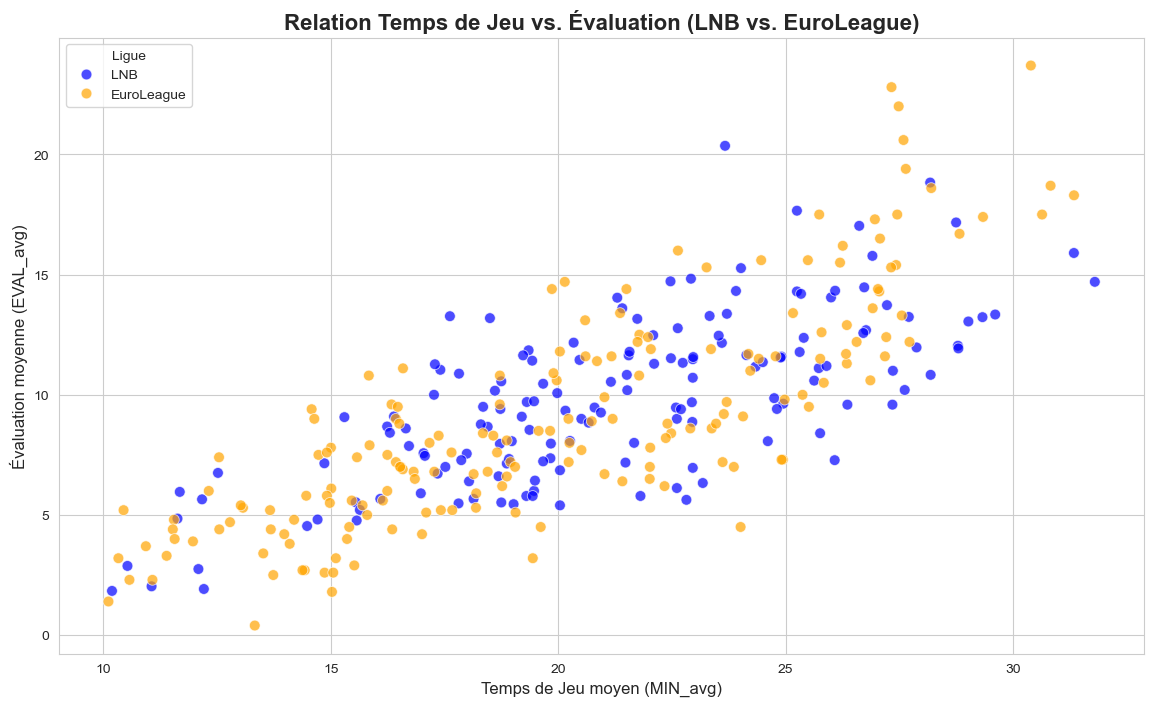

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Étape 6: Visualisation - Minutes vs. Évaluation par Ligue ---

if 'df_combined' in locals() and not df_combined.empty:

    print("Préparation des données pour la visualisation...")

    # Assurer que les colonnes sont numériques (au cas où il resterait des erreurs)
    cols_to_plot = ['MIN_avg', 'EVAL_avg']
    for col in cols_to_plot:
        if col in df_combined.columns:
            df_combined[col] = pd.to_numeric(df_combined[col], errors='coerce')
        else:
            print(f"Attention : Colonne '{col}' manquante pour la visualisation.")

    # Supprimer les lignes où les données pour le graphique sont manquantes
    df_viz = df_combined.dropna(subset=cols_to_plot)

    # Filtrer pour garder les joueurs avec un temps de jeu significatif (ex: >= 10 min)
    if 'MIN_avg' in df_viz.columns:
        df_viz = df_viz[df_viz['MIN_avg'] >= 10]
        print(f"Nombre de joueurs analysés (min 10 min/match): {len(df_viz)}")
    else:
        print("Colonne 'MIN_avg' non trouvée pour le filtrage.")


    if not df_viz.empty and all(col in df_viz.columns for col in ['MIN_avg', 'EVAL_avg', 'source']):
        print("Création du graphique...")
        # Définir le style
        sns.set_style("whitegrid")

        plt.figure(figsize=(14, 8)) # Taille du graphique

        # Créer le scatterplot avec des couleurs différentes par 'source'
        scatter_plot = sns.scatterplot(
            data=df_viz,
            x='MIN_avg',
            y='EVAL_avg',
            hue='source', # Différencie les couleurs par ligue
            palette={'LNB': 'blue', 'EuroLeague': 'orange'}, # Choisir les couleurs
            alpha=0.7, # Transparence
            s=60 # Taille des points
        )

        # Ajouter une ligne de régression (optionnel, peut surcharger)
        # sns.regplot(data=df_viz, x='MIN_avg', y='EVAL_avg', scatter=False, color='red', line_kws={'linestyle':'--'})

        # Titres et labels
        scatter_plot.set_title("Relation Temps de Jeu vs. Évaluation (LNB vs. EuroLeague)", fontsize=16, weight='bold')
        scatter_plot.set_xlabel("Temps de Jeu moyen (MIN_avg)", fontsize=12)
        scatter_plot.set_ylabel("Évaluation moyenne (EVAL_avg)", fontsize=12)
        scatter_plot.legend(title='Ligue')

        # Sauvegarder l'image (le livrable client !)
        viz_filename = 'graphique_minutes_vs_eval_par_ligue.png'
        try:
            plt.savefig(viz_filename, dpi=300, bbox_inches='tight')
            print(f"Graphique sauvegardé sous: '{viz_filename}'")
            #_py: fileTag(file_name=viz_filename)
        except Exception as e:
            print(f"Erreur lors de la sauvegarde du graphique : {e}")

        # plt.show() # Inutile dans Jupyter Lab/Notebook, l'image s'affiche

    elif df_viz.empty:
        print("Le DataFrame pour la visualisation est vide après filtrage.")
    else:
         print("Colonnes nécessaires ('MIN_avg', 'EVAL_avg', 'source') non trouvées dans df_viz.")

else:
    print("Erreur : Le DataFrame 'df_combined' n'a pas été trouvé ou est vide.")


In [21]:
# --- Étape 7: Comparaison Spécifique - Nadir Hifi ---

player_lastname_to_compare = "Hifi" # Ou un autre joueur présent dans les deux ligues

if 'df_combined' in locals() and not df_combined.empty:

    # Filtrer le DataFrame pour trouver le joueur
    df_player_compare = df_combined[df_combined['lastName'].str.contains(player_lastname_to_compare, case=False, na=False)]

    if not df_player_compare.empty:
        print(f"--- Comparaison des statistiques pour {player_lastname_to_compare} (LNB vs. EuroLeague) ---")
        
        # Afficher les statistiques côte à côte (ou l'une sous l'autre)
        # Transposer (.T) peut aider à la lisibilité si les colonnes sont nombreuses
        print(df_player_compare.T) 
        
        # Optionnel: Afficher seulement quelques stats clés pour une comparaison rapide
        # key_stats = ['source', 'GP', 'MIN_avg', 'PTS_avg', 'REB_avg', 'AST_avg', 'EVAL_avg', 'FG2_pct', 'FG3_pct']
        # print(df_player_compare[key_stats])

    else:
        print(f"Le joueur '{player_lastname_to_compare}' n'a pas été trouvé dans le DataFrame combiné.")
        print("Vérifiez l'orthographe ou essayez un autre joueur (ex: 'James', 'Okobo', 'De Colo').")

else:
    print("Erreur : Le DataFrame 'df_combined' n'a pas été trouvé ou est vide.")

--- Comparaison des statistiques pour Hifi (LNB vs. EuroLeague) ---
              0                 174
firstName   Nadir             NADIR
lastName     Hifi              HIFI
teamName    Paris  Paris Basketball
source        LNB        EuroLeague
GP           29.0              38.0
MIN_avg     22.92         19.967544
PTS_avg     18.17              15.1
REB_avg      2.69               2.1
AST_avg      2.59               1.3
STL_avg      0.79               0.6
BLK_avg      0.14               0.0
TO_avg       1.69               1.5
FG2_pct    0.4967             0.489
FG3_pct    0.3909             0.343
FT_pct     0.8731             0.857
EVAL_avg    14.83              10.6


Préparation des données pour le graphique comparatif de Hifi...
Graphique comparatif sauvegardé sous : 'comparaison_stats_Hifi.png'


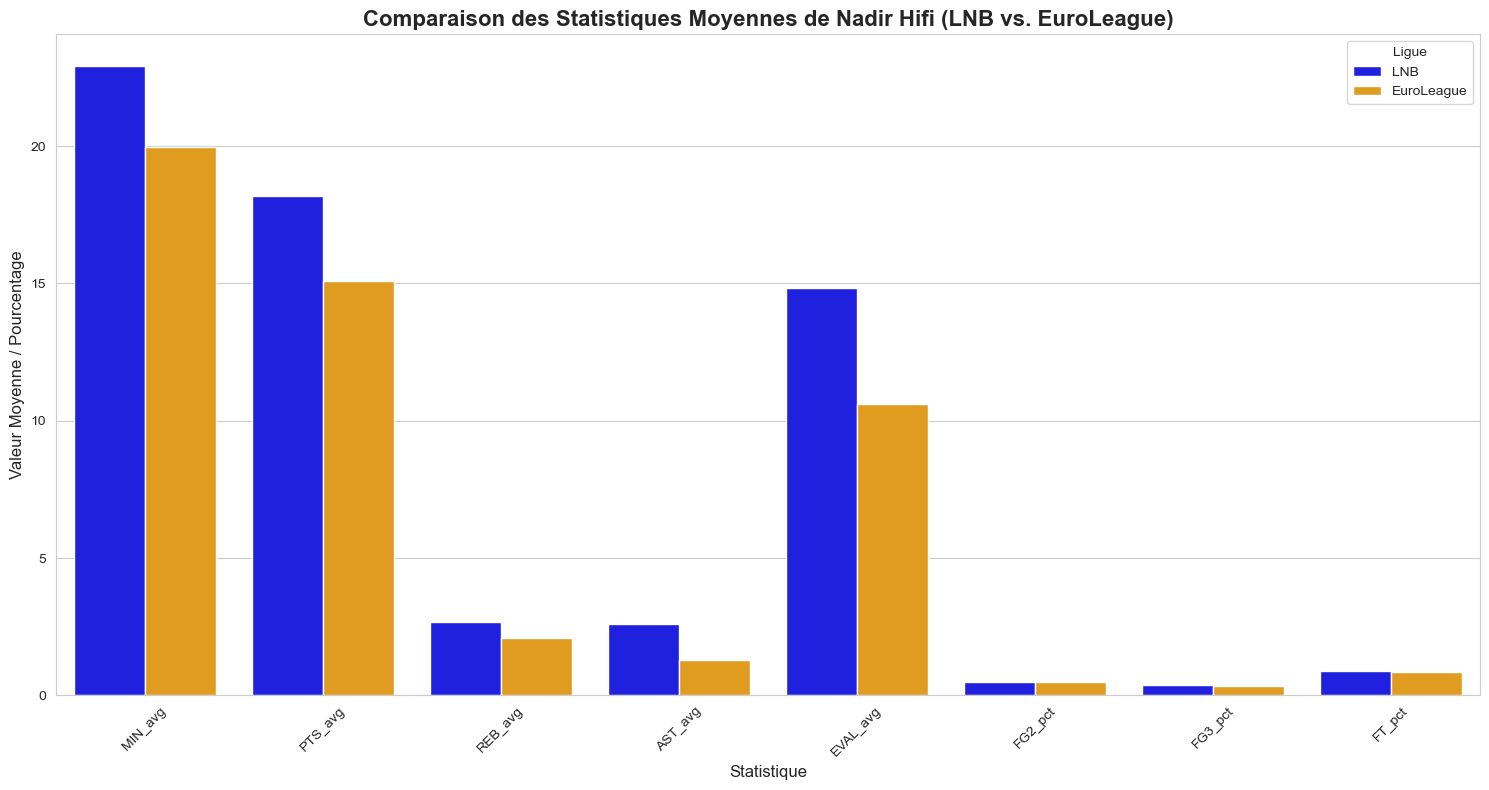

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Étape 8: Visualisation Comparative - Nadir Hifi ---

player_lastname_to_compare = "Hifi"

if 'df_combined' in locals() and not df_combined.empty:
    # Re-filtrer pour obtenir les données du joueur (au cas où)
    df_player_compare = df_combined[df_combined['lastName'].str.contains(player_lastname_to_compare, case=False, na=False)].copy() # Use .copy() to avoid SettingWithCopyWarning

    if len(df_player_compare) == 2: # S'assurer qu'on a bien les deux lignes (LNB et EuroLeague)
        print(f"Préparation des données pour le graphique comparatif de {player_lastname_to_compare}...")

        # Sélectionner les statistiques clés à comparer
        stats_to_plot = ['MIN_avg', 'PTS_avg', 'REB_avg', 'AST_avg', 'EVAL_avg', 'FG2_pct', 'FG3_pct', 'FT_pct']
        
        # S'assurer que les colonnes existent et sont numériques
        valid_stats = [stat for stat in stats_to_plot if stat in df_player_compare.columns]
        for stat in valid_stats:
             df_player_compare[stat] = pd.to_numeric(df_player_compare[stat], errors='coerce')

        # Mettre les données au format "long" pour Seaborn
        df_plot = df_player_compare[['source'] + valid_stats].melt(
            id_vars='source',
            var_name='Statistic',
            value_name='Value'
        )

        # Création du graphique (Grouped Bar Chart)
        plt.figure(figsize=(15, 8))
        bar_plot = sns.barplot(
            data=df_plot,
            x='Statistic',
            y='Value',
            hue='source', # Crée des barres groupées par ligue
            palette={'LNB': 'blue', 'EuroLeague': 'orange'}
        )

        # Ajouter des titres et labels clairs
        bar_plot.set_title(f"Comparaison des Statistiques Moyennes de Nadir Hifi (LNB vs. EuroLeague)", fontsize=16, weight='bold')
        bar_plot.set_xlabel("Statistique", fontsize=12)
        bar_plot.set_ylabel("Valeur Moyenne / Pourcentage", fontsize=12)
        bar_plot.tick_params(axis='x', rotation=45) # Pivoter les labels de l'axe X si besoin
        bar_plot.legend(title='Ligue')
        plt.tight_layout() # Ajuster la mise en page

        # Sauvegarder le graphique
        graph_filename = f'comparaison_stats_{player_lastname_to_compare}.png'
        try:
            plt.savefig(graph_filename, dpi=300)
            print(f"Graphique comparatif sauvegardé sous : '{graph_filename}'")
            #_py: fileTag(file_name=graph_filename)
        except Exception as e:
            print(f"Erreur lors de la sauvegarde du graphique : {e}")

        # plt.show()

    elif len(df_player_compare) < 2:
        print(f"Moins de deux entrées trouvées pour {player_lastname_to_compare}. Comparaison impossible.")
    else:
         print(f"Plus de deux entrées trouvées pour {player_lastname_to_compare}. Vérifiez les données.")

else:
    print("Erreur : Le DataFrame 'df_combined' n'a pas été trouvé ou est vide.")